In [4]:
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [7]:

# Define the stock symbol and date range
stock_symbol = 'AAPL'  # Apple Inc.
start_date = '2015-01-01'
end_date = '2024-01-01'

# Fetch the stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

data.sample(10)



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-18,37.299999,37.532501,37.167500,37.520000,35.169197,71475200
2015-02-18,31.907499,32.195000,31.862499,32.180000,28.882479,179566800
2022-09-09,155.470001,157.820007,154.750000,157.369995,156.036972,68028800
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.279762,101832400
2017-03-09,34.685001,34.697498,34.262501,34.669998,32.364174,88623600
2019-12-16,69.250000,70.197502,69.245003,69.964996,68.075264,128186000
2020-10-08,116.250000,116.400002,114.589996,114.970001,112.636459,83477200
2015-07-22,30.497499,31.375000,30.497499,31.305000,28.214500,461802400
2020-12-11,122.430000,122.760002,120.550003,122.410004,120.132355,86939800


Open: The price at which the stock first traded upon the opening of the exchange on that day. For example, on January 2, 2015, Apple's stock opened at $27.8475.

High: The highest price at which the stock traded during the trading day. On January 2, 2015, the highest price was $27.8600.


Low: The lowest price at which the stock traded during the trading day. On January 2, 2015, the lowest price was $26.8375.

Close: The price of the stock at the closing of the trading day. On January 2, 2015, Apple's stock closed at $27.3325.

Adj Close: This is the closing price adjusted for both dividends and splits. For example, the adjusted closing price on January 2, 2015, was $24.4353. This adjustment is useful for comparing historical stock prices on a consistent basis.

Volume: The number of shares that changed hands during a given day. For January 2, 2015, the volume was 212,818,400 shares.

In [10]:


close_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


In [14]:
window_size = 60


In [15]:
import numpy as np

X_train = []
y_train = []

for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0]) 
    y_train.append(scaled_data[i, 0])  

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25

69/69 [==============================] - 5s 24ms/step - loss: 0.0209
Epoch 2/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0033
Epoch 3/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0026
Epoch 4/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0025
Epoch 5/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0023
Epoch 6/25
69/69 [==============================] - 2s 25ms/step - loss: 0.0022
Epoch 7/25
69/69 [==============================] - 2s 24ms/step - loss: 0.0022
Epoch 8/25
69/69 [==============================] - 2s 24ms/step - loss: 0.0023
Epoch 9/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0020
Epoch 10/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0021
Epoch 11/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0020
Epoch 12/25
69/69 [==============================] - 2s 23ms/step - loss: 0.0018
Epoch 13/25
69/69 [=================

In [19]:
last_window = X_train[-1].reshape(1, window_size, 1)
predicted_price = model.predict(last_window)
predicted_price = scaler.inverse_transform(predicted_price) 
print("Predicted next price:", predicted_price)


1/1 [==============================] - 1s 640ms/step
Predicted next price: [[187.89354]]


69/69 [==============================] - 1s 9ms/step


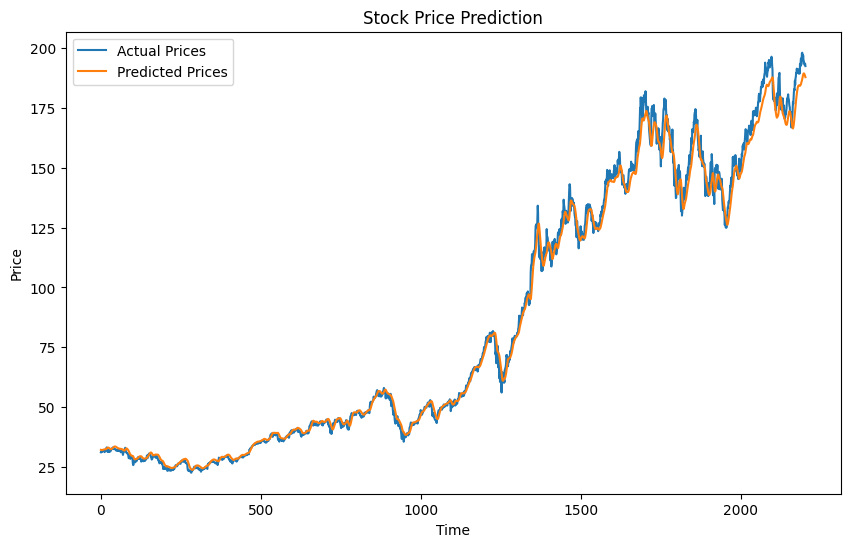

In [20]:
import matplotlib.pyplot as plt

predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)  
actual = scaler.inverse_transform(y_train.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
